### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

## Libraries

In [2]:
# Libs

# data structures
import pandas as pd
import numpy as np

# my folder path
from pathlib import Path
myfolder = Path("C:/Users/pdpc/Documents/MLfiles/Data/")

# graphs
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# train/test split
from sklearn.model_selection import train_test_split

# time function for timing program run
import time

# Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ColTransf / Pipeline / GridSearch
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [173]:
# Sravan Katragadda custom functions

# Data Visualization
def graph_histogram(df,xgiven,huegiven,graphdict):
    
    plt.figure(figsize=(13, 6))    
    
    graph = sns.histplot(df, x=xgiven, hue=huegiven, multiple='dodge',shrink=0.8)
    graph.set_title(graphdict['title'],fontsize=14)
    #graph.set_xlabel(graphdict['titlex'], fontsize=14)
    #graph.set_ylabel(graphdict['titley'], fontsize=14)
    graph.legend(labels=graphdict['legendlabels'], fontsize=12) #title=graphdict['legendtitle'], title_fontsize=12
    
    # y axis increments in 1000's
    #from matplotlib.ticker import MultipleLocator
    #plt.gca().yaxis.set_major_locator(MultipleLocator(500))
    
    # graph background to lighter grey
    plt.gca().set_facecolor('#F0F0F0')

In [ ]:
# patch for overcoming 'float' error in nump 24.1v
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1]:
# Data

BerkAIdatafolder = Path("C:/Users/pdpc/Documents/MLfiles/Data/berkAIdata/")

coupons = pd.read_csv(BerkAIdatafolder / 'coupons.csv')

coupons.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Quick Look at Data

print("Dataset shape:  ",coupons.shape)
print("Dataset size:   ",coupons.size)
print("Duplicate rows: ",coupons.duplicated().sum())
print("# of columns with numerical features  :   ",len(coupons.select_dtypes(include=['int64', 'float64']).columns.values))
print("# of columns with categorical features:   ",len(coupons.select_dtypes(include=['object', 'category']).columns.values))

Dataset shape:   (12684, 26)
Dataset size:    329784
Duplicate rows:  74
# of columns with numerical features  :    8
# of columns with categorical features:    18


2. Investigate the dataset for missing or problematic data.

In [5]:
# Let's Check the null values

coupons.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
#Duplicate Rows

print("Duplicate rows: ",coupons.duplicated().sum())

Duplicate rows:  74


3. Decide what to do about your missing data -- drop, replace, other...

#### Null Values and Duplicate Rows Analysis

A. There are 6 columns with null values:

1. Car: This entire column is blank - I choose to delete this column

2. Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 - I choose to delete the rows with null values in these columns

B. There are 74 duplicate rows which I will delete

Rationale: The dataset is huge with 12684 and the 'data loss' will be less than 1% even if I delete the rows with null values and duplicate rows

In [7]:
# Data

coupons = pd.read_csv(BerkAIdatafolder / 'coupons.csv')

# Replacing Y values of 0 and 1 with N and Y
replace_dict = {0: 'N', 1: 'Y'}

pre_size = coupons.shape[0]

# Removing Car column
coupons = coupons.drop(['car'], axis=1, errors='ignore')

# Removing rows with null values
coupons.dropna(inplace=True)
coupons.replace(replace_dict, inplace=True)

# Removing duplicate rows
coupons.drop_duplicates(keep='first', inplace=True)

post_size = coupons.shape[0]

print('Data Retention %' , "%.4f" % (post_size / pre_size * 100))

<IPython.core.display.Javascript object>

Data Retention % 94.6626


In [8]:
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,Y,N,N,N,Y,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,Y,N,N,N,Y,N
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,Y,N,N,N,Y,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,Y,Y,N,N,Y,N
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,Y,N,N,N,Y,N


4. What proportion of the total observations chose to accept the coupon? 



In [9]:
print( "%.2f" % (coupons.query("Y=='N'").shape[0] / coupons.shape[0] * 100), '% of the customers rejected the coupon')
print( "%.2f" % (coupons.query("Y=='Y'").shape[0] / coupons.shape[0] * 100), '% of the customers accepted the coupon')

43.16 % of the customers rejected the coupon
56.84 % of the customers accepted the coupon


5. Use a bar plot to visualize the `coupon` column.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

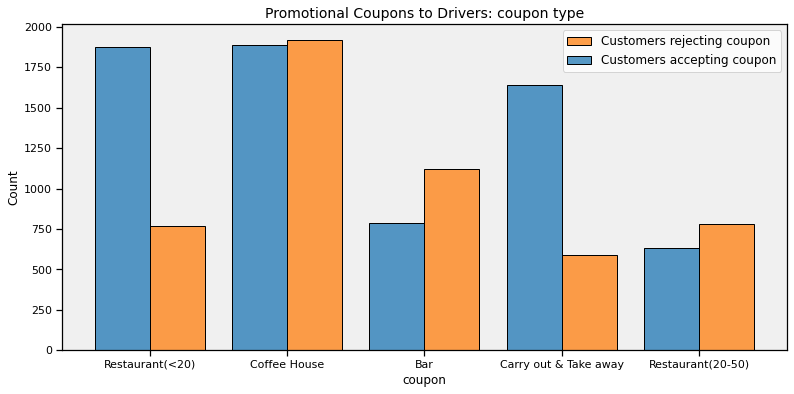

In [175]:
# Bar Plot with my custom function

graphdict = {'title':'Promotional Coupons to Drivers: coupon type','titlex':'Type of coupon','titley':'Customer count',
                    'legendtitle':'', 'legendlabels':{'Customers accepting coupon', 'Customers rejecting coupon'}}

graph_histogram(coupons,'coupon','Y',graphdict)

6. Use a histogram to visualize the temperature column.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

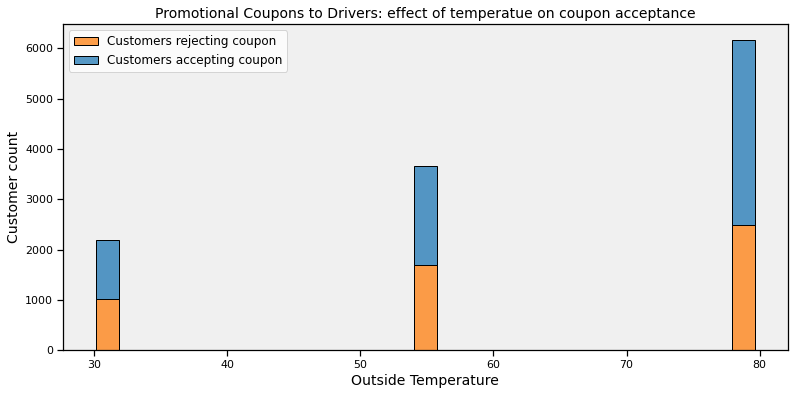

In [153]:
# Histogram with my custom function

graphdict = {'title':'Promotional Coupons to Drivers: effect of temperatue on coupon acceptance','titlex':'Outside Temperature','titley':'Customer count',
                    'legendtitle':'', 'legendlabels':{'Customers accepting coupon', 'Customers rejecting coupon'}}

graph_histogram(coupons,'temperature','Y',graphdict)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [154]:
coupons_bar = coupons.query('coupon == "Bar"')

coupons_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,Y,N,N,N,Y,Y
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,Y,N,N,Y,N,Y
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,Y,Y,Y,N,Y,Y
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,Y,N,N,N,Y,N
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,Y,N,N,Y,N,N


2. What proportion of bar coupons were accepted?


In [155]:
print('Total Bar Coupons Given:' , coupons_bar.shape[0])
print( "%.2f" % (coupons_bar.query("Y=='N'").shape[0] / coupons_bar.shape[0] * 100), '% of the customers rejected the Bar coupons')
print( "%.2f" % (coupons_bar.query("Y=='Y'").shape[0] / coupons_bar.shape[0] * 100), '% of the customers accepted the Bar coupons')

Total Bar Coupons Given: 1906
58.81 % of the customers rejected the Bar coupons
41.19 % of the customers accepted the Bar coupons


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [156]:
coupons_bar.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

1906
1713
Acceptance Rate for drivers who who went to a bar 3 or fewer times a month 37.24 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

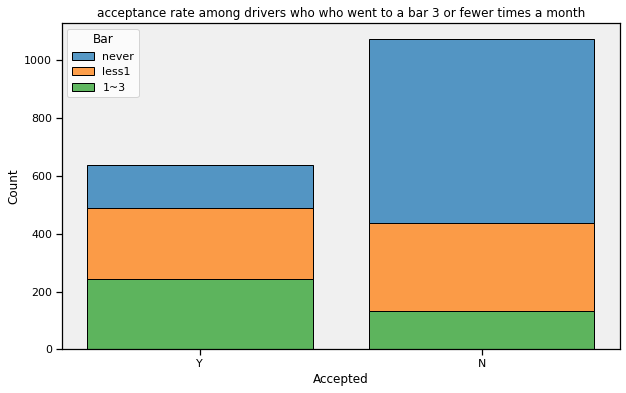

In [201]:
# Query
conditionality = 'drivers who who went to a bar 3 or fewer times a month'
filtereddf = coupons_bar
print(filtereddf.shape[0])
filtereddf = filtereddf[filtereddf['Bar'].isin(['never', 'less1', '1~3'])]
print(filtereddf.shape[0])
accept_count = (filtereddf.query('Y == "Y"').count()['Y'])
reject_count = (filtereddf.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count
print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(filtereddf, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

1906
193
Acceptance Rate for drivers who who went to a bar more than 3 times a month 76.17 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

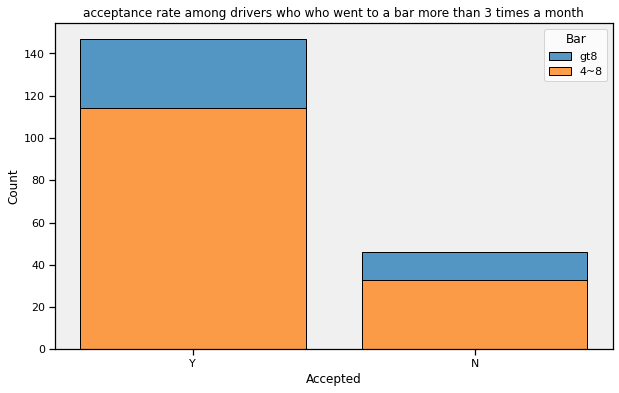

In [202]:
conditionality = 'drivers who who went to a bar more than 3 times a month'
filtereddf = coupons_bar
print(filtereddf.shape[0])
filtereddf = filtereddf[filtereddf['Bar'].isin(['gt8', '4~8'])]
print(filtereddf.shape[0])
accept_count = (filtereddf.query('Y == "Y"').count()['Y'])
reject_count = (filtereddf.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count
print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(filtereddf, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

### Analysis

Acceptance Rate for drivers who who went to a bar 3 or fewer times a month 37.24 %

Acceptance Rate for drivers who who went to a bar more than 3 times a month 76.17 %

#### Clearly the acceptance rate among people who go to bar more than thrice a month is DOUBLE than the others**


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
coupons_bar.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [18]:
coupons_bar.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

1906
572
403
Acceptance Rate for drivers who go to bars more than once a month and are over the age of 25 68.98 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

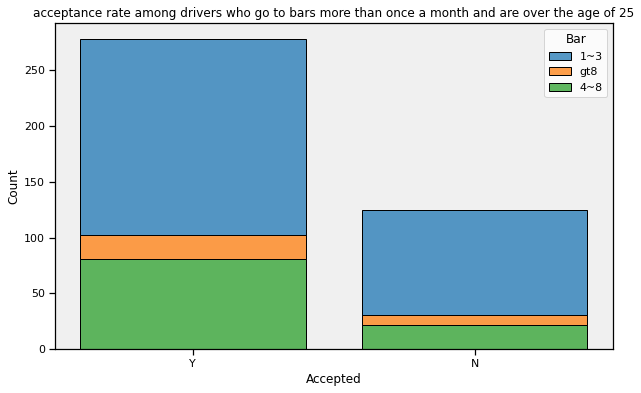

In [203]:
conditionality = 'drivers who go to bars more than once a month and are over the age of 25'

filtereddf = coupons_bar
print(filtereddf.shape[0])
filtereddf = filtereddf[filtereddf['Bar'].isin(['1~3', 'gt8', '4~8'])]
print(filtereddf.shape[0])
filtereddf = filtereddf[filtereddf['age'].isin(['46', '26', '31', '41', '50plus', '36'])]
print(filtereddf.shape[0])
accept_count = (filtereddf.query('Y == "Y"').count()['Y'])
reject_count = (filtereddf.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count
print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(filtereddf, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

1906
1334
1906
1334
1906


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

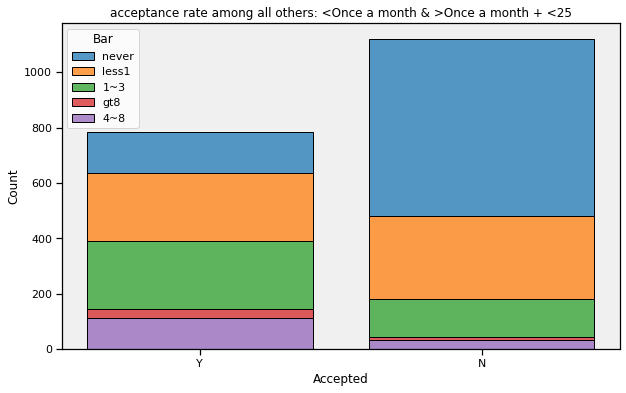

In [204]:
conditionality = 'all others: <Once a month & >Once a month + <25'

# <Once a month
filtereddf = coupons_bar
print(filtereddf.shape[0])
filtereddf1 = filtereddf[filtereddf['Bar'].isin(['never', 'less1'])]
print(filtereddf1.shape[0])


# >Once a month + <25
filtereddf = coupons_bar
print(filtereddf.shape[0])
filtereddf2 = filtereddf[filtereddf['Bar'].isin(['1~3', 'gt8', '4~8'])]
print(filtereddf1.shape[0])
filtereddf2 = filtereddf2[filtereddf2['age'].isin(['21', 'below21'])]
print(filtereddf.shape[0])

# Union (removing duplicates)
df_union = pd.concat([filtereddf1, filtereddf2]).drop_duplicates()

accept_count = (df_union.query('Y == "Y"').count()['Y'])
reject_count = (df_union.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(filtereddf, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

### Analysis

Acceptance Rate for drivers who go to bars more than once a month and are over the age of 25 is 68.98 %

Acceptance Rate for all others: <Once a month & <Once a month + <25 is 33.73 %


#### Clearly the acceptance rate among people who go to bars more than once a month and are over the age of 25 is DOUBLE than the others**


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


1906
572
403
403
Acceptance Rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 33.73 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

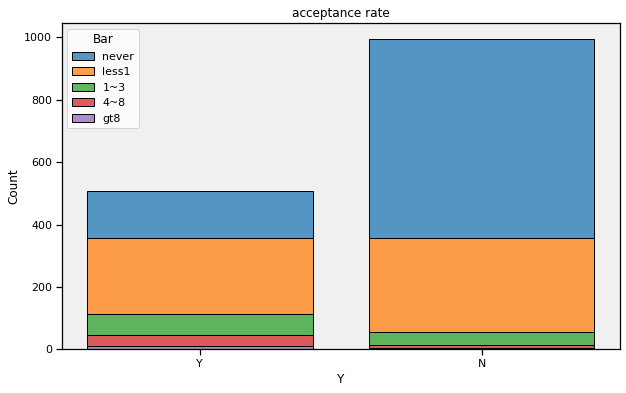

In [213]:
# Unsure if this question is asking for all conditions to be met or if it is one by one
# Below is the solution where all conditionalities are met 

conditionality = 'drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry'

filtereddf = coupons_bar
print(filtereddf.shape[0])

filtereddf = filtereddf[coupons_bar['Bar'].isin(['1~3', 'gt8', '4~8'])]
print(filtereddf.shape[0])

filtereddf = filtereddf.query('has_children == "N"')
print(filtereddf.shape[0])

filtereddf = filtereddf.query('occupation != "Farming Fishing & Forestry"')
print(filtereddf.shape[0])

accept_count = (df_union.query('Y == "Y"').count()['Y'])
reject_count = (df_union.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count

print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(df_union, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = 'acceptance rate'); plt.gca().set_facecolor('#F0F0F0')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



1906
572
403
403
Acceptance Rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed 33.73 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

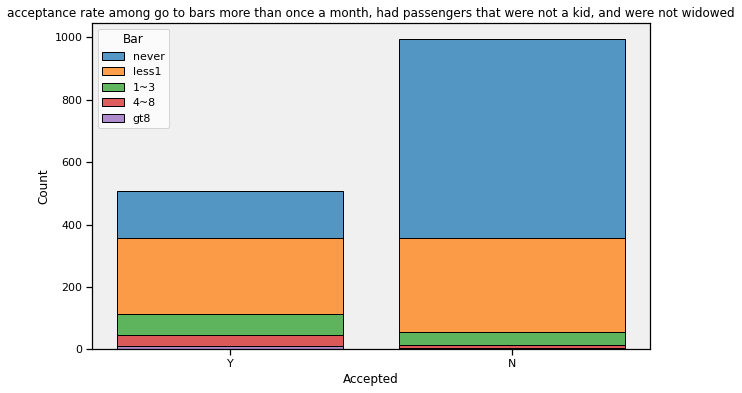

In [214]:
conditionality = 'go to bars more than once a month, had passengers that were not a kid, and were not widowed'

filtereddf = coupons_bar
print(filtereddf.shape[0])

filtereddf = filtereddf[coupons_bar['Bar'].isin(['1~3', 'gt8', '4~8'])]
print(filtereddf.shape[0])

filtereddf = filtereddf.query('has_children == "N"')
print(filtereddf.shape[0])

filtereddf = filtereddf.query('maritalStatus != "Widowed"')
print(filtereddf.shape[0])

accept_count = (df_union.query('Y == "Y"').count()['Y'])
reject_count = (df_union.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count

print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(df_union, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

12007
3424
1519
Acceptance Rate for go to bars more than once a month and are under the age of 30 33.73 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

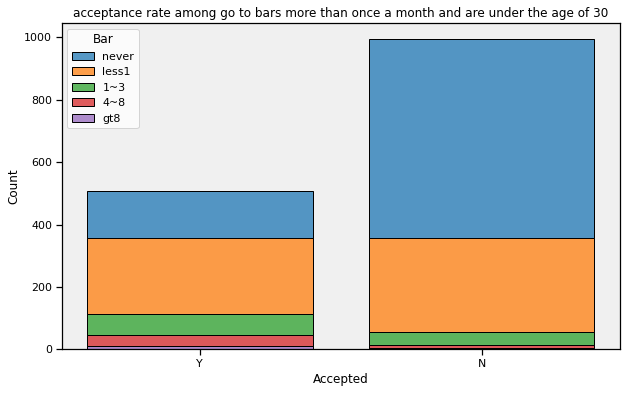

In [215]:
conditionality = 'go to bars more than once a month and are under the age of 30'

filtereddf = coupons
print(filtereddf.shape[0])

filtereddf = filtereddf[filtereddf['RestaurantLessThan20'].isin(['4~8'])]
print(filtereddf.shape[0])

filtereddf = filtereddf[filtereddf['age'].isin(['21', 'below21','26'])]
print(filtereddf.shape[0])

accept_count = (df_union.query('Y == "Y"').count()['Y'])
reject_count = (df_union.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count

print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(df_union, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

1906
147
96
Acceptance Rate for go to cheap restaurants more than 4 times a month and income is less than 50K 33.73 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

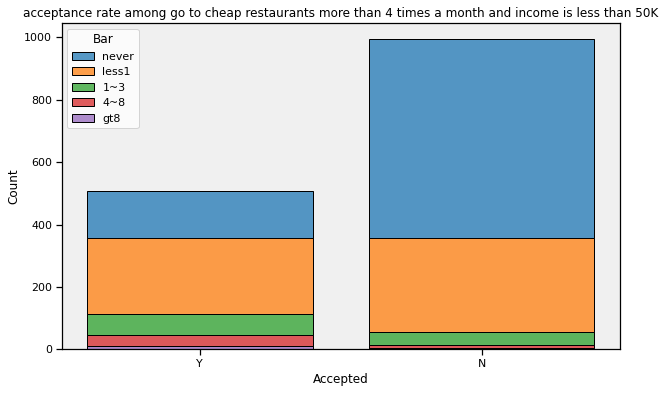

In [216]:
conditionality = 'go to cheap restaurants more than 4 times a month and income is less than 50K'

filtereddf = coupons_bar
print(filtereddf.shape[0])

filtereddf = filtereddf[coupons_bar['Bar'].isin(['4~8'])]
print(filtereddf.shape[0])

filtereddf = filtereddf[filtereddf['age'].isin(['21', 'below21','26'])]
print(filtereddf.shape[0])

accept_count = (df_union.query('Y == "Y"').count()['Y'])
reject_count = (df_union.query('Y == "N"').count()['Y'])
total_count  = accept_count + reject_count

print('Acceptance Rate for' , conditionality , '%.2f' % (accept_count/total_count*100) , '%')

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(df_union, x='Y', hue='Bar', multiple='stack', shrink=0.8)
graph.set(title = f'acceptance rate among {conditionality}',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Below are the observations:
    
1. 58.81 % of the customers rejected the Bar coupons

2. 41.19 % of the customers accepted the Bar coupons

3. Acceptance Rate for drivers who who went to a bar 3 or fewer times a month 37.24 %

4. Acceptance Rate for drivers who who went to a bar more than 3 times a month 76.17 %

**Clearly the acceptance rate among people who go to bar more than thrice a month is DOUBLE than the others**

5. Acceptance Rate for drivers who go to bars more than once a month and are over the age of 25 is 68.98 %

6. Acceptance Rate for all others: <Once a month & <Once a month + <25 is 33.73 %


**Clearly the acceptance rate among people who go to bars more than once a month and are over the age of 25 is DOUBLE than the others**

7. Acceptance Rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 33.73 %

8. Acceptance Rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed 33.73 %

9. Acceptance Rate for go to bars more than once a month and are under the age of 30 33.73 %

10. Acceptance Rate for go to cheap restaurants more than 4 times a month and income is less than 50K 33.73 %

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

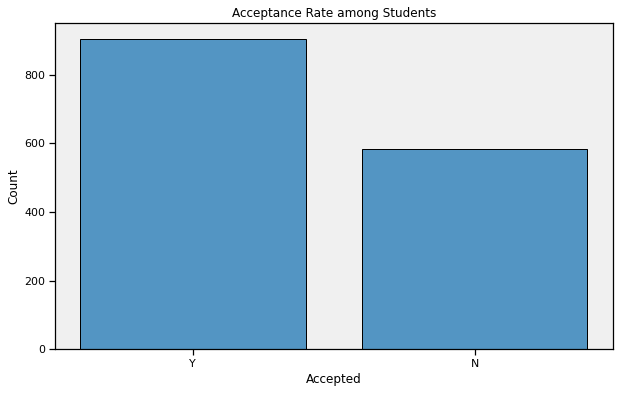

In [219]:
# Investigation 1

# Hypothesis: Acceptance Rate is higher among students
    
# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(coupons.query('occupation == "Student"'), x='Y', multiple='stack', shrink=0.8)
graph.set(title = 'Acceptance Rate among Students',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

#### Investigation 1 Result

#### HYPOTHESIS IS TRUE! 

#### Acceptance Rate is higher among students!!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

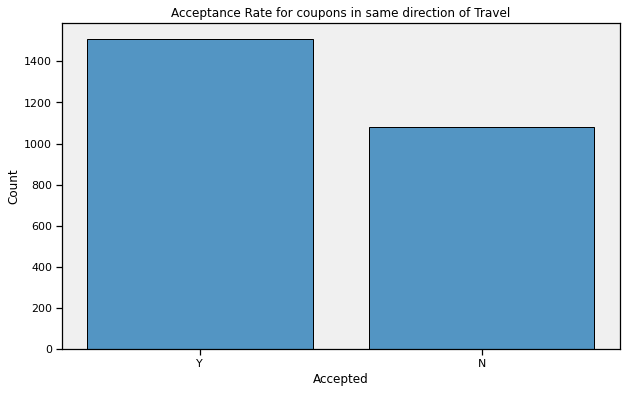

In [224]:
# Investigation 2

# Hypothesis: If the coupon is in the same direction of Travel, Acceptance rate is higher

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(coupons.query('direction_same == "Y"'), x='Y', multiple='stack', shrink=0.8)
graph.set(title = 'Acceptance Rate for coupons in same direction of Travel',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

#### Investigation 2 Result

#### HYPOTHESIS IS TRUE! 

#### If the coupon is in the same direction of Travel, Acceptance rate is higher!!

In [27]:
# Investigation 3

# Hypothesis: Acceptance rate is higher for Good Weather (Sunny) than Bad Weather (Snowy, Rainy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

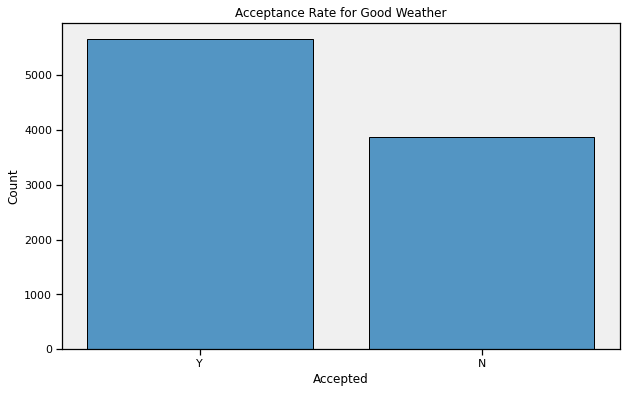

In [227]:
# Histogram for Good Weather - Sunny

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(coupons.query('weather == "Sunny"'), x='Y', multiple='stack', shrink=0.8)
graph.set(title = 'Acceptance Rate for Good Weather',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

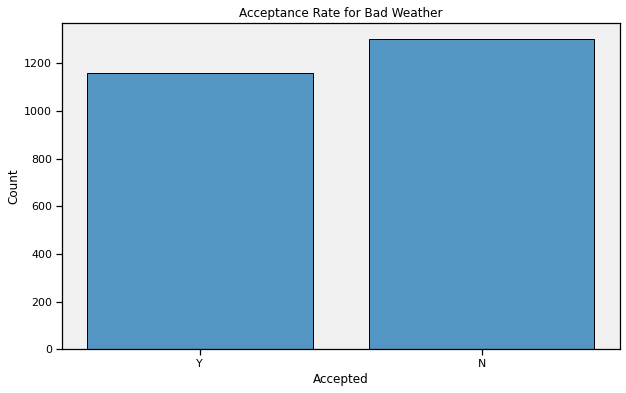

In [228]:
# Histogram for Bad Weather - Snowy & Rainy

# Plot
plt.figure(figsize=(10, 6)) 
graph = sns.histplot(coupons.query('weather != "Sunny"'), x='Y', multiple='stack', shrink=0.8)
graph.set(title = 'Acceptance Rate for Bad Weather',xlabel='Accepted') ; plt.gca().set_facecolor('#F0F0F0')

#### Investigation 3 Result

#### HYPOTHESIS IS TRUE! 

#### Acceptance rate is higher for Good Weather (Sunny) than Bad Weather (Snowy, Rainy)